# Analysing Simulation Runs

In [20]:
import sys
import pandas as pd
sys.path.append("/Users/pvs262/Documents/rec-sys-dynamics/code")
from src.analysis.cluster import post_process, cluster, analysis

def getLatents(folder):
    directory = "../simulation_runs/Explore_Threshold_2/"+folder
    latents = []
    for i in range(100):
        df = pd.read_pickle(directory+'/L'+str(i)+'pkl.gzip', compression = 'gzip')
        latents.append(df)   
    return latents

def getResults(folder):
    directory = "../simulation_runs/Explore_Threshold_2/"+folder
    results = []
    for i in range(100):
        df = pd.read_pickle(directory+'/R'+str(i)+'pkl.gzip', compression = 'gzip')
        results.append(df) 
    return results

def recalResults(folder):
    latents = getLatents(folder)
    print(len(latents))
    results_list = []
    for i in range(len(latents)):
        cluster_obj = cluster(latents[i],0.3)
        results_list.append(cluster_obj.gmm(3, covariance_type='full', df='proba', svd = False))
    return results_list

def getUI(folder):
    directory = "../simulation_runs/Explore_Threshold_2/"+folder
    UI = []
    for i in range(100):
        df = pd.read_pickle(directory+'/UI'+str(i)+'pkl.gzip', compression = 'gzip')   
        UI.append(df)
    return UI

In [2]:
import plotly.graph_objects as go
import plotly.offline as py

def colour(i): 
    # plot 3D scatter plot
    # Configure Plotly to be rendered inline in the notebook.
    py.init_notebook_mode()
     # Configure the 0 trace.
    trace_0 = go.Scatter3d(
        x=self.latents[i][self.results[i].cluster == 0][0],  # <-- Put your data instead
        y=self.latents[i][self.results[i].cluster == 0][1],  # <-- Put your data instead
        z=self.latents[i][self.results[i].cluster == 0][2],  # <-- Put your data instead
        mode='markers',
        #marker=marker
        marker_color='rgba(0, 152, 0, .8)'
    )
    # Configure the 1 trace.
    trace_1 = go.Scatter3d(
        x=self.latents[i][self.results[i].cluster == 1][0],  # <-- Put your data instead
        y=self.latents[i][self.results[i].cluster == 1][1],  # <-- Put your data instead
        z=self.latents[i][self.results[i].cluster == 1][2],  # <-- Put your data instead
        mode='markers',
        #marker=marker
        marker_color='rgba(152, 0, 0, .8)'
    )
    data = [trace_0,trace_1]
    if (len(self.results[i].cluster.unique())==3):
        # Configure the -1 trace.
        trace_2 = go.Scatter3d(
            x=self.latents[i][self.results[i].cluster == -1][0],  # <-- Put your data instead
            y=self.latents[i][self.results[i].cluster == -1][1],  # <-- Put your data instead
            z=self.latents[i][self.results[i].cluster == -1][2],  # <-- Put your data instead
            mode='markers',
            #marker=marker
            marker_color='rgba(0, 0, 152, .8)'
        )
        data.append(trace_2)
    
    
    # Configure the layout.
    layout = go.Layout(
        margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
    )
    
    plot_figure = go.Figure(data=data, layout=layout)
    # Render the plot.
    py.iplot(plot_figure)


In [ ]:
    def plot_scatter(self, i, pred, show_cluster):
        # Assign colours based on clusters
        if show_cluster:
            marker0 = {'size': 3,'opacity': 0.8,'color':'rgb(0, 157, 0)'}
            marker1 = {'size': 3,'opacity': 0.8,'color':'rgb(0, 0, 157)'}
            marker2 = {'size': 3,'opacity': 0.8,'color':'rgb(157, 0, 0)'}
        else:
            marker0 = {'size': 3,'opacity': 0.8,'color':'rgb(0, 0, 0)'}
            marker1 = {'size': 3,'opacity': 0.8,'color':'rgb(0, 0, 0)'}
            marker2 = {'size': 3,'opacity': 0.8,'color':'rgb(0, 0, 0)'}
        
        # check input dataset to plot
        if len(self.latents[i].columns) >= 3:
            # Configure the 0 trace.
            trace_0 = go.Scatter3d(
                x=self.latents[i][self.results[i].cluster == 0][0],  # <-- Put your data instead
                y=self.latents[i][self.results[i].cluster == 0][1],  # <-- Put your data instead
                z=self.latents[i][self.results[i].cluster == 0][2],  # <-- Put your data instead
                mode='markers',
                marker=marker0
            )
            # Configure the 1 trace.
            trace_1 = go.Scatter3d(
                x=self.latents[i][self.results[i].cluster == 1][0],  # <-- Put your data instead
                y=self.latents[i][self.results[i].cluster == 1][1],  # <-- Put your data instead
                z=self.latents[i][self.results[i].cluster == 1][2],  # <-- Put your data instead
                mode='markers',
                marker=marker1
            )
            data = [trace_0,trace_1]
            
            if (len(self.results[i].cluster.unique())==3):
                # Configure the -1 trace.
                trace_2 = go.Scatter3d(
                    x=self.latents[i][self.results[i].cluster == -1][0],  # <-- Put your data instead
                    y=self.latents[i][self.results[i].cluster == -1][1],  # <-- Put your data instead
                    z=self.latents[i][self.results[i].cluster == -1][2],  # <-- Put your data instead
                    mode='markers',
                     marker=marker2
                )
                data.append(trace_2)
        else:
            # Latents contains 2 or less latent features to reach 30% explained variance. 
            # calculate latents from UI
            temp = cluster(self.UI[i],3)
            temp.svd()
            temp_lats = temp.data
            
            # create traces
            # Configure the 0 trace.
            trace_0 = go.Scatter3d(
                x=temp_lats[i][self.results[i].cluster == 0][0],  # <-- Put your data instead
                y=temp_lats[i][self.results[i].cluster == 0][1],  # <-- Put your data instead
                z=temp_lats[i][self.results[i].cluster == 0][2],  # <-- Put your data instead
                mode='markers',
                marker=marker0
            )
            # Configure the 1 trace.
            trace_1 = go.Scatter3d(
                x=temp_lats[i][self.results[i].cluster == 1][0],  # <-- Put your data instead
                y=temp_lats[i][self.results[i].cluster == 1][1],  # <-- Put your data instead
                z=temp_lats[i][self.results[i].cluster == 1][2],  # <-- Put your data instead
                mode='markers',
                marker=marker1
            )
            data = [trace_0,trace_1]
            
            if (len(self.results[i].cluster.unique())==3):
                # Configure the -1 trace.
                trace_2 = go.Scatter3d(
                    x=temp_lats[i][self.results[i].cluster == -1][0],  # <-- Put your data instead
                    y=temp_lats[i][self.results[i].cluster == -1][1],  # <-- Put your data instead
                    z=temp_lats[i][self.results[i].cluster == -1][2],  # <-- Put your data instead
                    mode='markers',
                     marker=marker2
                )
                data.append(trace_2)
                
        if len(self.latents[i].columns) > 3:
            self._logger.warning("30% variance explained by MORE than 3 features. 3D scatter plot will only plot first 3 features.")            
            
        elif len(self.latents[i].columns) < 3:
            self._logger.warning("30% variance explained by LESS than 3 features. 3D scatter plot will plot first 3 features.")            
            
        # plot 3D scatter plot
        # Configure Plotly to be rendered inline in the notebook.
        py.init_notebook_mode()

        # Configure the layout.
        layout = go.Layout(margin={'l': 0, 'r': 0, 'b': 0, 't': 0})
        plot_figure = go.Figure(data=data, layout=layout)

        # Render the plot.
        py.iplot(plot_figure)
        return None

In [ ]:
sim = 'item_based_2BCMU_0_0_30_100'
latents = getLatents(sim)
results = getResults(sim)
UI = getUI(sim)
item_based_2BCMU_0_0_30_100 = post_process(latents, results, UI)
item_based_2BCMU_0_0_30_100.rename_cluster(1,99);

In [ ]:
item_based_2BCMU_0_0_30_100.examine(2, 'gmm');
item_based_2BCMU_0_0_30_100.examine(3, 'gmm');
item_based_2BCMU_0_0_30_100.examine(99, 'gmm');

### Recalculating Results for 2BCMU and 2BCLI

100


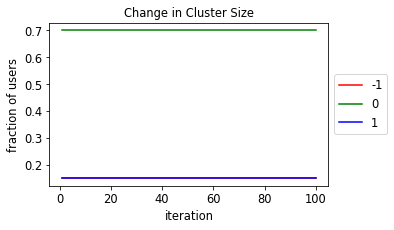

In [31]:
sim = 'cosin_2BCMU_10_0_30_100'
latents = getLatents(sim)
UI = getUI(sim)
results = recalResults(sim)
len(results)
pp_obj = post_process(latents, results, UI)
pp_obj.rename_cluster(1,99)
pp_obj.plot_percent()

In [32]:
results[0]

,cluster,0,-1,1
1,1,0.0,0.000000e+00,1.000000e+00
2,1,0.0,0.000000e+00,1.000000e+00
3,1,0.0,1.092519e-299,1.000000e+00
4,1,0.0,0.000000e+00,1.000000e+00
5,1,0.0,1.242159e-270,1.000000e+00
...,...,...,...,...
996,-1,0.0,1.000000e+00,4.710656e-201
997,-1,0.0,1.000000e+00,1.308083e-141
998,-1,0.0,1.000000e+00,2.944792e-161
999,-1,0.0,1.000000e+00,0.000000e+00


In [33]:
for i in range(len(results)):
    results[i].to_pickle('../simulation_runs/Explore_Threshold_2/'+sim+'/R'+str(i)+'pkl.gzip', compression = 'gzip')